In [1]:
# Import standard operational packages.
import numpy as np
import pandas as pd
# Important tools for modeling and evaluation.
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
# Import visualization packages.
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("larsen0966/penguins")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/larsen0966/penguins/versions/1


In [3]:
penguins = pd.read_csv("/root/.cache/kagglehub/datasets/larsen0966/penguins/versions/1/penguins.csv")

In [4]:
penguins.head(10)

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,6,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
6,7,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female,2007
7,8,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male,2007
8,9,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
9,10,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007


In [5]:
penguins['species'].unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [6]:
# Find the count of each species type.

penguins['species'].value_counts(dropna = False)

,count
species,
Adelie,152
Gentoo,124
Chinstrap,68


In [7]:
# Check for missing values.

penguins.isnull().sum()

,0
Unnamed: 0,0
species,0
island,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11
year,0


In [8]:
penguins_subset = penguins.dropna(axis=0).reset_index(drop = True)

In [9]:
penguins_subset.isna().sum()

,0
Unnamed: 0,0
species,0
island,0
bill_length_mm,0
bill_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0
year,0


In [10]:
penguins_subset.head(10)

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
4,6,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
5,7,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female,2007
6,8,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male,2007
7,13,Adelie,Torgersen,41.1,17.6,182.0,3200.0,female,2007
8,14,Adelie,Torgersen,38.6,21.2,191.0,3800.0,male,2007
9,15,Adelie,Torgersen,34.6,21.1,198.0,4400.0,male,2007


In [11]:
penguins_subset['sex'] = penguins_subset['sex'].str.upper()

In [12]:
penguins_subset.head()

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,2007
3,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,2007
4,6,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE,2007


In [13]:
penguins_subset = pd.get_dummies(penguins_subset, drop_first = True, columns=['sex'])

In [14]:
penguins_subset.head()

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,sex_MALE
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,2007,True
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,2007,False
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,2007,False
3,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,2007,False
4,6,Adelie,Torgersen,39.3,20.6,190.0,3650.0,2007,True


In [15]:
penguins_subset = penguins_subset.drop(['island'], axis=1)

In [16]:
X = penguins_subset.drop(['species'], axis=1)

In [17]:
#Scale the features.
#Assign the scaled data to variable `X_scaled`.

X_scaled = StandardScaler().fit_transform(X)

In [18]:
# Fit K-means and evaluate inertia for different values of k.

num_clusters = [i for i in range(2, 11)]

def kmeans_inertia(num_clusters, x_vals):

    inertia = []
    for i in num_clusters:
        kms = KMeans(n_clusters=i, random_state=17)
        kms.fit(x_vals)
        inertia.append(kms.inertia_)

    return inertia

In [19]:
# Return a list of inertia for k=2 to 10.

inertia = kmeans_inertia(num_clusters, X_scaled)
inertia

[1504.4001997743687,
 1100.1625039490675,
 907.4755936818134,
 699.9016714231603,
 633.7763868558245,
 567.2834608519977,
 484.90736570359473,
 451.7598595432463,
 385.26693353941954]

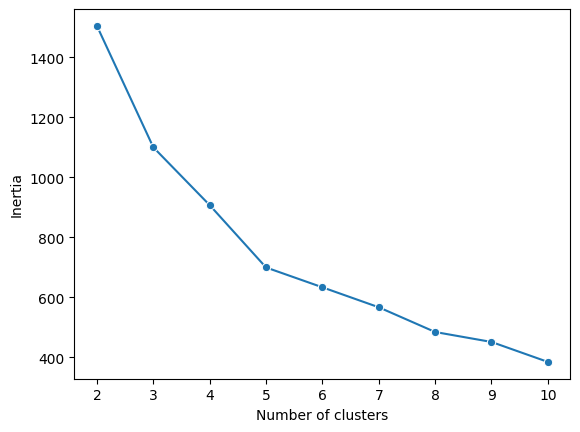

In [20]:
plot = sns.lineplot(x=num_clusters, y=inertia, marker = 'o')
plot.set_xlabel("Number of clusters");
plot.set_ylabel("Inertia");

In [21]:
# Calculate silhouette score.
# Write a function to return a list of each k-value's score.

def kmeans_sil(num_clusters, x_vals):
    sil_score = []
    for i in num_clusters:
        kms = KMeans(n_clusters=i, random_state=17)
        kms.fit(x_vals)
        sil_score.append(silhouette_score(x_vals, kms.labels_))

    return sil_score


sil_score = kmeans_sil(num_clusters, X_scaled)
sil_score

[np.float64(0.32726520106035956),
 np.float64(0.3743613130578347),
 np.float64(0.38136577627784796),
 np.float64(0.3920716763122453),
 np.float64(0.3932362660249549),
 np.float64(0.38198790659750514),
 np.float64(0.3846458731558431),
 np.float64(0.381950298261846),
 np.float64(0.39108401159044587)]

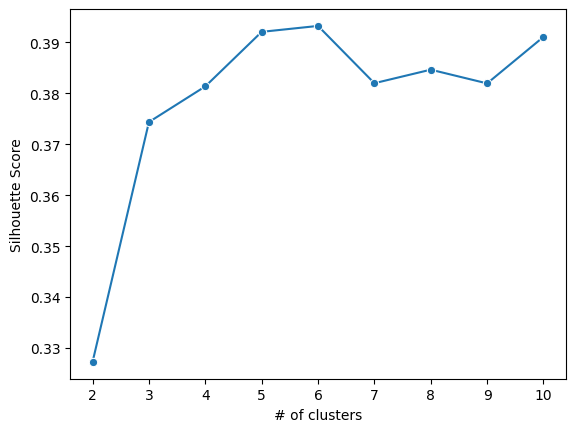

In [22]:
plot = sns.lineplot(x=num_clusters, y=sil_score, marker = 'o')
plot.set_xlabel("# of clusters");
plot.set_ylabel("Silhouette Score");

In [24]:
# Fit a 6-cluster model.

kmeans6 = KMeans(n_clusters=6, random_state=17)
kmeans6.fit(X_scaled)

KMeans(n_clusters=6, random_state=17)

In [25]:
# Print unique labels.

print('Unique labels:', np.unique(kmeans6.labels_))

Unique labels: [0 1 2 3 4 5]


In [26]:
# Create a new column `cluster`.

penguins_subset['cluster'] = kmeans6.labels_
penguins_subset.head()

,Unnamed: 0,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,sex_MALE,cluster
0,1,Adelie,39.1,18.7,181.0,3750.0,2007,True,4
1,2,Adelie,39.5,17.4,186.0,3800.0,2007,False,0
2,3,Adelie,40.3,18.0,195.0,3250.0,2007,False,0
3,5,Adelie,36.7,19.3,193.0,3450.0,2007,False,0
4,6,Adelie,39.3,20.6,190.0,3650.0,2007,True,4


In [27]:
# Verify if any `cluster` can be differentiated by `species`.

penguins_subset.groupby(by=['cluster', 'species']).size()

,,0
cluster,species,
0,Adelie,73
1,Gentoo,61
2,Chinstrap,35
3,Gentoo,58
4,Adelie,73
5,Chinstrap,33


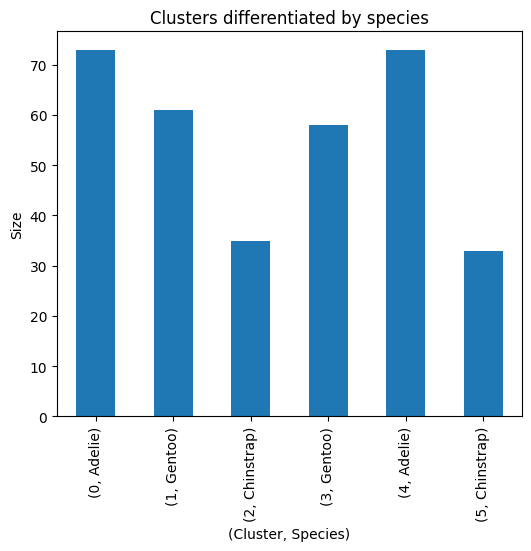

In [28]:
penguins_subset.groupby(by=['cluster', 'species']).size().plot.bar(title='Clusters differentiated by species',
                                                                   figsize=(6, 5),
                                                                   ylabel='Size',
                                                                   xlabel='(Cluster, Species)');

In [29]:
# Verify if each `cluster` can be differentiated by `species` AND `sex_MALE`.

penguins_subset.groupby(by=['cluster','species', 'sex_MALE']).size().sort_values(ascending = False)

,,,0
cluster,species,sex_MALE,
0,Adelie,False,73
4,Adelie,True,73
1,Gentoo,True,61
3,Gentoo,False,58
2,Chinstrap,True,22
5,Chinstrap,False,21
2,Chinstrap,False,13
5,Chinstrap,True,12


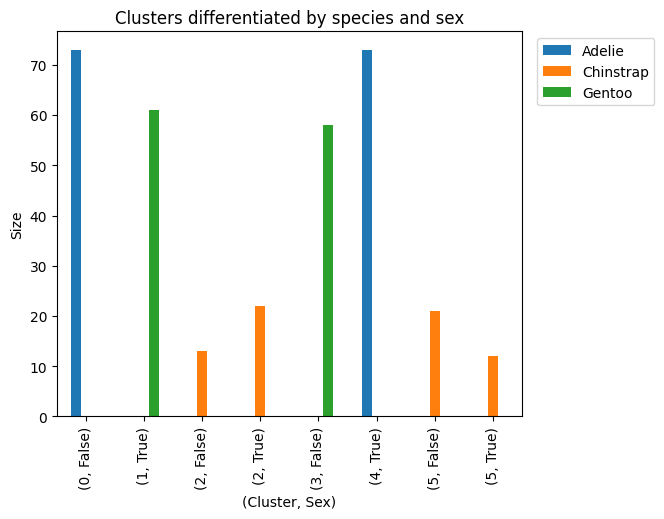

In [30]:
penguins_subset.groupby(by=['cluster','species','sex_MALE']).size().unstack(level = 'species', fill_value=0).plot.bar(title='Clusters differentiated by species and sex',
                                                                                                                      figsize=(6, 5),
                                                                                                                      ylabel='Size',
                                                                                                                      xlabel='(Cluster, Sex)')
plt.legend(bbox_to_anchor=(1.3, 1.0))